# **1. 선형 회귀 모형**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
%matplotlib inline

### **1.1. 데이터 로드**

In [ ]:
# Boston 데이터 로드
boston = load_boston()

# Boston 데이터 DataFrame으로 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# boston 데이터의 타겟 변수와 정의
bostonDF['PRICE'] = boston.target
bostonDF.shape
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### **1.2. 데이터 시각화**

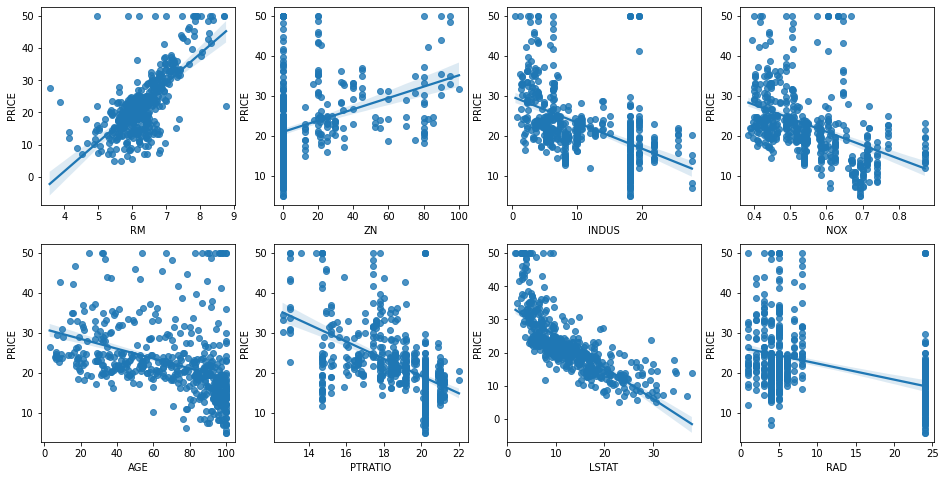

In [ ]:
# 타겟 변수와 설명 변수간의 상관관계 확인을 위한 시각화
# 2개의 행과 4개의 열을 가진 multi-plot
fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  sns.regplot(x = feature, y = 'PRICE', data = bostonDF, ax = axs[row][col])

### **1.3. 선형 회귀 모형 생성**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 타겟 변수와 설명 변수 데이터를 구분
y_target = bostonDF['PRICE']
X_data   = bostonDF.drop('PRICE', axis = 1, inplace = False)

# 선형 회귀 모형 생성 
LM = LinearRegression()
LM.fit(X_data, y_target)

# 예측값 생성
y_preds = LM.predict(X_data)

# 예측값 비교
pd.DataFrame({'y_target' : y_target, 'y_preds' : y_preds})

,y_target,y_preds
0,24.0,30.003843
1,21.6,25.025562
2,34.7,30.567597
3,33.4,28.607036
4,36.2,27.943524
...,...,...
501,22.4,23.533341
502,20.6,22.375719
503,23.9,27.627426
504,22.0,26.127967


In [ ]:
print('intercept:', np.round(LM.intercept_, 1))
print('coefficients:', np.round(LM.coef_, 1))

intercept: 36.5
coefficients: [ -0.1   0.    0.    2.7 -17.8   3.8   0.   -1.5   0.3  -0.   -1.    0.
  -0.5]


In [ ]:
coeff = pd.Series(data = np.round(LM.coef_, 1), index = X_data.columns)
coeff

CRIM       -0.1
ZN          0.0
INDUS       0.0
CHAS        2.7
NOX       -17.8
RM          3.8
AGE         0.0
DIS        -1.5
RAD         0.3
TAX        -0.0
PTRATIO    -1.0
B           0.0
LSTAT      -0.5
dtype: float64